In this notebook we will apply `TableAutomization.py` file to a simple linear model.

### Importing the needed libraries 

In [1]:
from cuqi.distribution import UserDefinedDistribution, Gaussian
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
from cuqi.model import LinearModel
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS

import time

import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))

# Now you should be able to import the module
from utilities import TableAutomization as TA
from cuqi.distribution import Distribution



# Simple Linear Model


$$b = x_1 + x_2 + e \;\;\mathrm{with}\;\; e \sim \mathrm{Gaussain}(0, 0.1)$$

We can write it as:

$$b = \mathbf{A}\mathbf{x} + e = \large(1,1\large)\binom{x_1}{x_2} + e$$




|variable     |    description          |dimension      |
|:------------|:------------------------|:--------------|
|$\mathbf{x}$ |parameter to be inferred |2-dimensional​  |
|$\mathbf{A}$ |forward model            |1-by-2 matrix  |
|$b$          |data                     | 1-dimensional |
|$e$          |noise                    |1-dimensional  ​|

### inverse problem: given observed data $b$, determine $x_1$, and $x_2$

 

We assume prior as $$ \mathbf{x} \sim \mathrm{Gaussian}(\mathbf{0}, \delta^2 \mathbf{I}) $$

In [24]:
x = Gaussian(np.zeros(2), 2.5)
A_matrix = np.array([[1.0, 1.0]])
A = LinearModel(A_matrix)
b= Gaussian(A@x, 0.1)
BP = BayesianProblem(b, x)

Setting specific observed data "b_ob"

In [ ]:

specific =  np.array([1.5,1.5 ])
b_ob = b(x = specific).sample()
BP.set_data(b=b_ob)

BayesianProblem with target: 
 Posterior(
    Equation:
	 p(x|b) ∝ L(x|b)p(x)
    Densities:
	b ~ CUQI Gaussian Likelihood function. Parameters ['x'].
 	x ~ CUQI Gaussian.
 )

In [5]:
target_simplest = BP.posterior

Now we are ready to apply the TableAutomization function to this target distribution ! 

In [21]:
df, (fig, axs) = TA.create_comparison(target_simplest, 0.05, 8500, 1500, seed = 12,chains=2)

Sample 10000 / 10000

Average acceptance rate: 0.9288235294117647 

Sample 10000 / 10000

Average acceptance rate: 0.5629411764705883 MCMC scale: 0.550651762247407 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000


In [22]:
TA.print_table(df)

+------------+---------+----------+-------+---------+----------+-------+--------+----------+
|   Method   | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1)  |   AR  | LogPDF | Gradient |
+------------+---------+----------+-------+---------+----------+-------+--------+----------+
|  MH_fixed  |   8500  |   1500   |  0.05 |  8.899  |  8.081   | 0.929 | 20000  |    0     |
| MH_adapted |   8500  |   1500   |  0.05 |  40.816 |  41.326  | 0.563 | 20000  |    0     |
|    ULA     |   8500  |   1500   |  0.05 |  51.691 |  50.114  |  1.0  | 20000  |  20000   |
|    MALA    |   8500  |   1500   |  0.05 |  52.22  |  52.389  | 0.919 | 20000  |  20000   |
|    NUTS    |   8500  |   1500   |  0.05 | 1599.39 | 1605.778 | 0.767 | 110482 |  110482  |
+------------+---------+----------+-------+---------+----------+-------+--------+----------+


_Observations_

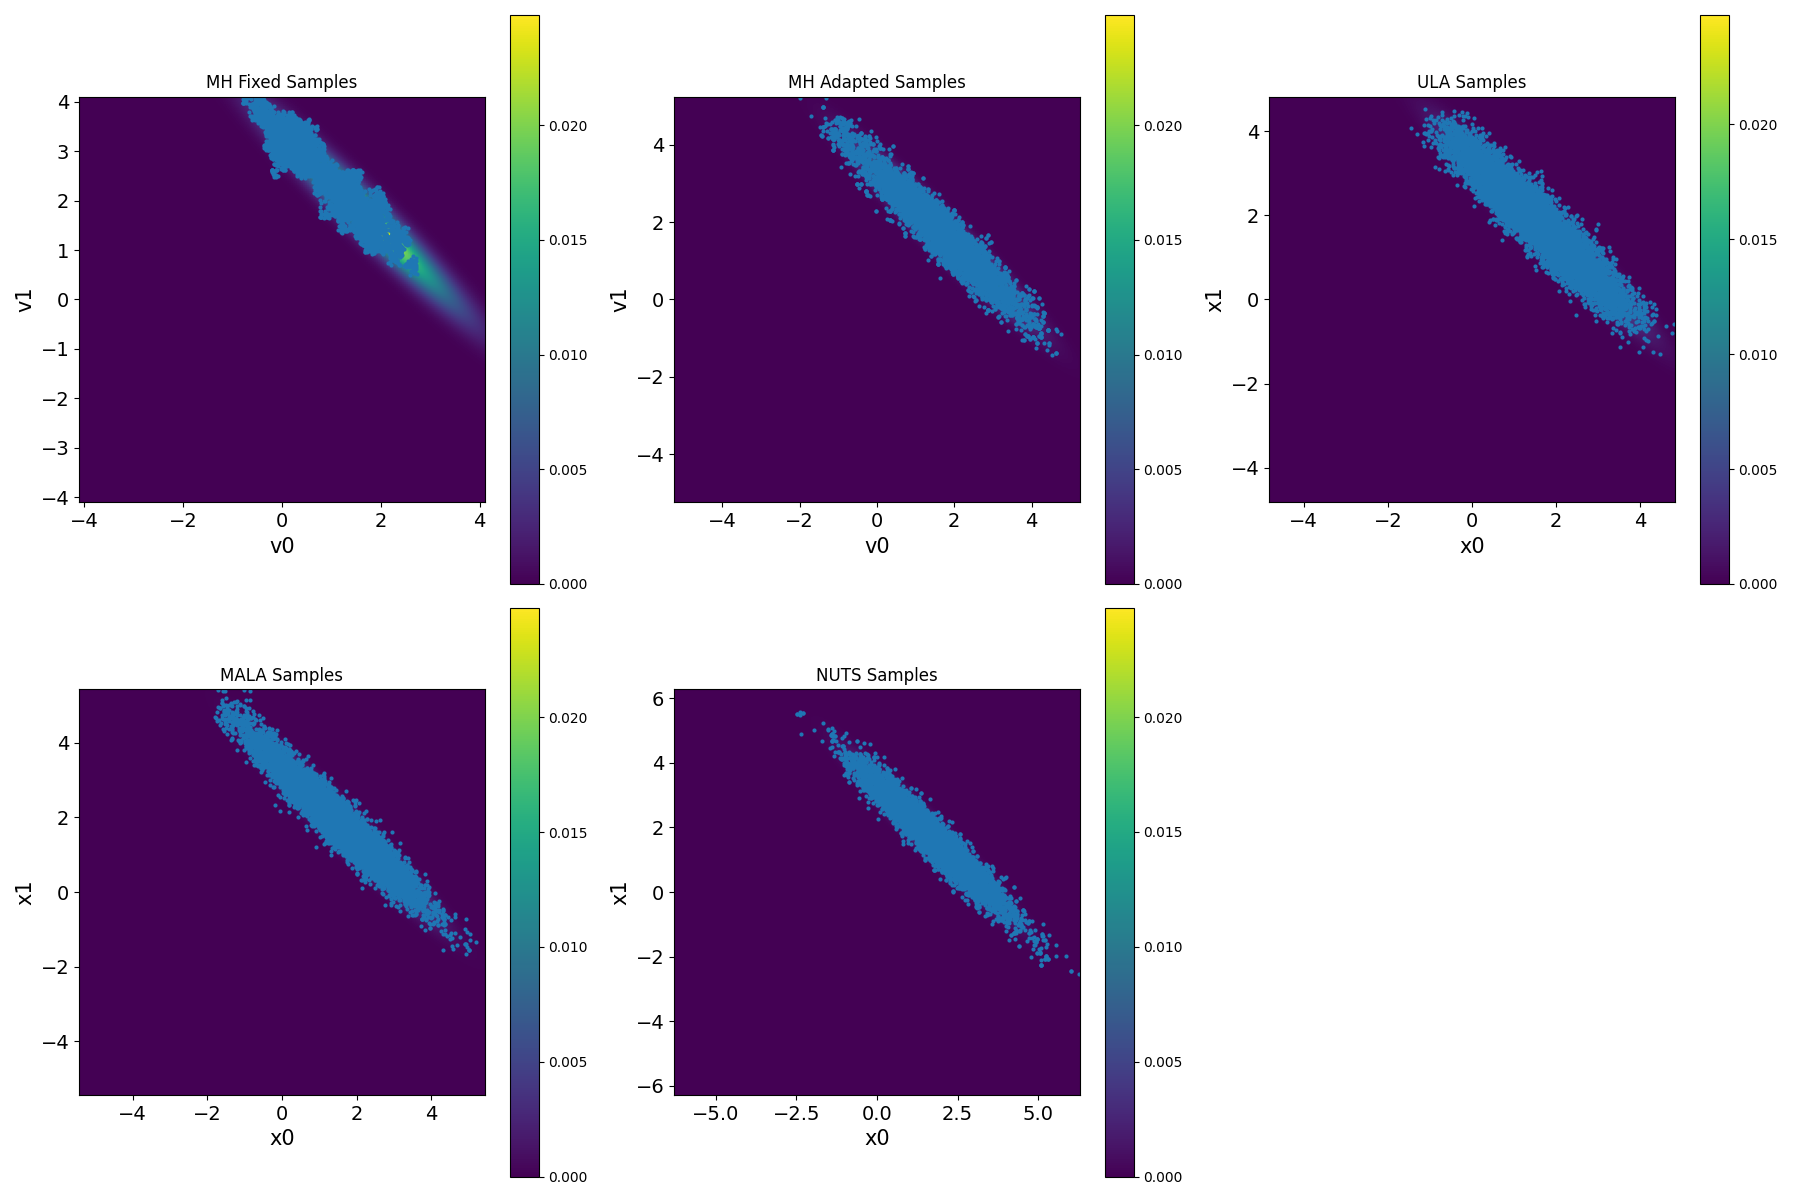

In [9]:
TA.show_plot(fig)

_Observations_